
<h2> Dataset: </h2>

"Fraud_Data" - information about each user first transaction <br>

<h2> Columns: </h2>

1. user_id: Unique user ID
2. signup_time: The time when the user created their account (GMT time)
3. purchase_time: The time when the user bought the item (GMT time)
4. purchase_value: The cost of the item purchased (USD)
5. device_id: The device id. You can assume that it is unique by device. (If two transactions have the same device ID that means that the same physical device was used to purchase)
6. source: User marketing channel: ads, SEO, direct 
7. browser: The browser used by the user.
8. sex: User sex: Male/Female
9. age: user age
10. ip_address: user numeric IP address
11. class: This is the target variable. Fraudulent activities is tagged as ‘1’, whereas non-fraudulent activities are tagged as ‘0’


In [17]:
#Notebook preferences
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import sklearn
import os
import itertools


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = False
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20

In [3]:
df = pd.read_csv("../../fraud/Fraud_Data.csv")
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [71]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Some handy scripts:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.copper):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.tight_layout()
   

    return plt

<h2>Baseline model </h2>

In [72]:
def baseline_model(df):
    no_fraud = np.zeros(len(df))
    return no_fraud

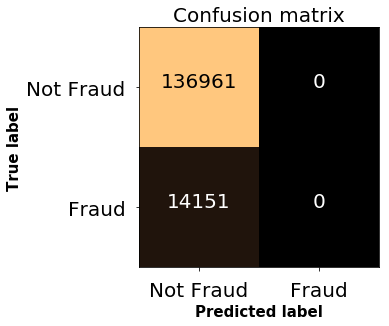

[[136961      0]
 [ 14151      0]]


In [76]:
y_pred = baseline_model(df)
cm = confusion_matrix(df['class'], y_pred)
fig = plt.figure(figsize=(7, 5))
plot = plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'], normalize=False, title='Confusion matrix')
plt.savefig('baseline_cm.png')
plt.show()
print(cm)

No handles with labels found to put in legend.


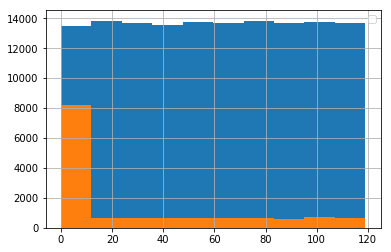

In [48]:
fig, ax = plt.subplots()
df.groupby('class')['lagdays'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


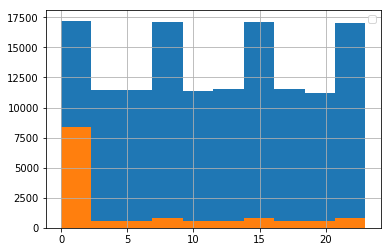

In [52]:
fig, ax = plt.subplots()
df.groupby('class')['laghrz'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


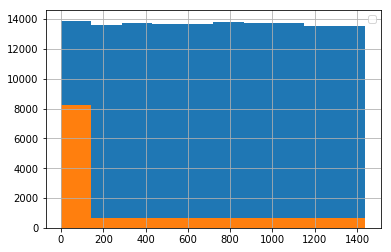

In [54]:
fig, ax = plt.subplots()
df.groupby('class')['lagminz'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


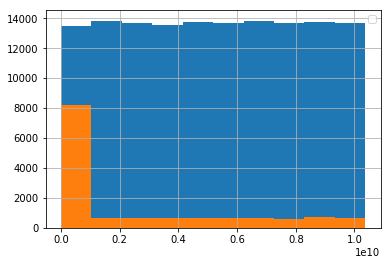

In [99]:
fig, ax = plt.subplots()
df.groupby('class')['lagmilli'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


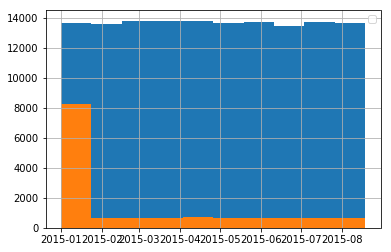

In [127]:
fig, ax = plt.subplots()
df.groupby('class')['signup_time'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


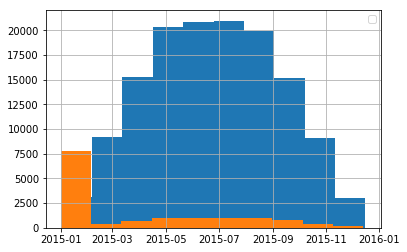

In [128]:
fig, ax = plt.subplots()
df.groupby('class')['purchase_time'].hist(ax=ax)
ax.legend();

In [163]:
df[df['class']==0].lagmilli.min()

137000.0

In [167]:
137000/3600

38.05555555555556

In [185]:
df['purchase_time'].min()

Timestamp('2015-01-01 00:00:44')

In [186]:
df['purchase_time'].max()

Timestamp('2015-12-16 02:56:05')

No handles with labels found to put in legend.


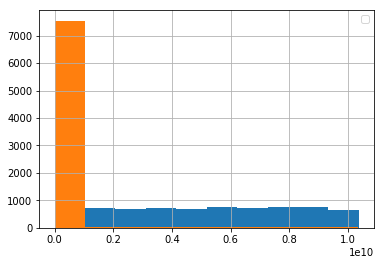

In [183]:
fig, ax = plt.subplots()
df[(df['signup_time']<'2015-01-13')&(df['lagdays'] <= 200)].groupby('class')['lagmilli'].hist(ax=ax, bins = 10)
ax.legend();

In [95]:
df.groupby('class')[['user_id']].count()

,user_id
class,
0,136961
1,14151


In [111]:
df.query('lagmilli == 1000').groupby('class')['user_id'].count()

class
1    7600
Name: user_id, dtype: int64

In [117]:
print('{:.64f}'.format(df['lagmilli'].iloc[25]))

960070000.0000000000000000000000000000000000000000000000000000000000000000


No handles with labels found to put in legend.


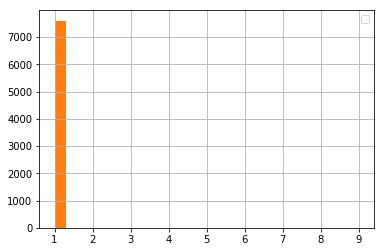

In [83]:
fig, ax = plt.subplots()
df[df['lagsecs']<10].groupby('class')['lagsecs'].hist(ax=ax)
ax.legend();

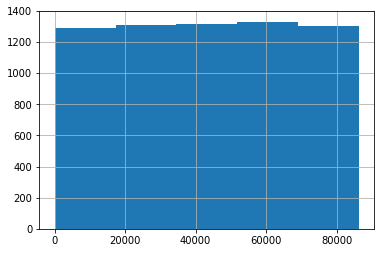

In [71]:
df['lagsecs'][df['class']==1][df['lagsecs']>1].hist(bins = 5)

No handles with labels found to put in legend.


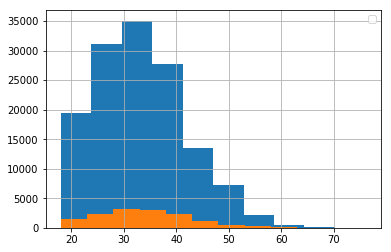

In [28]:
fig, ax = plt.subplots()
df.groupby('class')['age'].hist(ax=ax)
ax.legend();

In [24]:
df.groupby('purchase_value').agg({'class':['mean', 'std']})

class          
                    mean       std
purchase_value                    
9               0.097246  0.296356
10              0.098498  0.298053
11              0.083954  0.277376
12              0.088736  0.284420
13              0.099422  0.299285
14              0.082774  0.275592
15              0.095306  0.293690
16              0.102498  0.303358
17              0.112340  0.315840
18              0.095319  0.293705
19              0.117451  0.322010
20              0.096301  0.295053
21              0.094705  0.292856
22              0.085289  0.279358
23              0.105143  0.306788
24              0.089467  0.285462
25              0.089547  0.285579
26              0.075676  0.264521
27              0.094806  0.292993
28              0.099760  0.299724
29              0.076772  0.266273
30              0.067289  0.250562
31              0.083053  0.276009
32              0.118147  0.322833
33              0.095850  0.294434
34              0.083469  0.276634
35              0.091758  0.288733
36              0.077782  0.267874
37              0.072373  0.259150
38              0.095271  0.293638
...                  ...       ...
101             0.068966  0.257881
102             0.000000  0.000000
103             0.000000  0.000000
104             0.176471  0.392953
105             0.000000  0.000000
106             0.076923  0.271746
107             0.000000  0.000000
108             0.050000  0.223607
109             0.000000  0.000000
110             0.058824  0.242536
111             0.125000  0.353553
112             0.000000  0.000000
113             0.000000  0.000000
114             0.000000  0.000000
115             0.000000  0.000000
116             0.000000  0.000000
117             0.000000  0.000000
118             0.000000  0.000000
119             0.000000  0.000000
120             0.000000       NaN
121             0.000000       NaN
122             0.000000       NaN
123             0.000000       NaN
125             0.000000       NaN
127             0.000000  0.000000
128             0.000000  0.000000
129             0.000000  0.000000
132             0.000000       NaN
140             0.000000       NaN
154             0.000000       NaN

[122 rows x 2 columns]

In [120]:
country_fraud

NameError: name 'country_fraud' is not defined

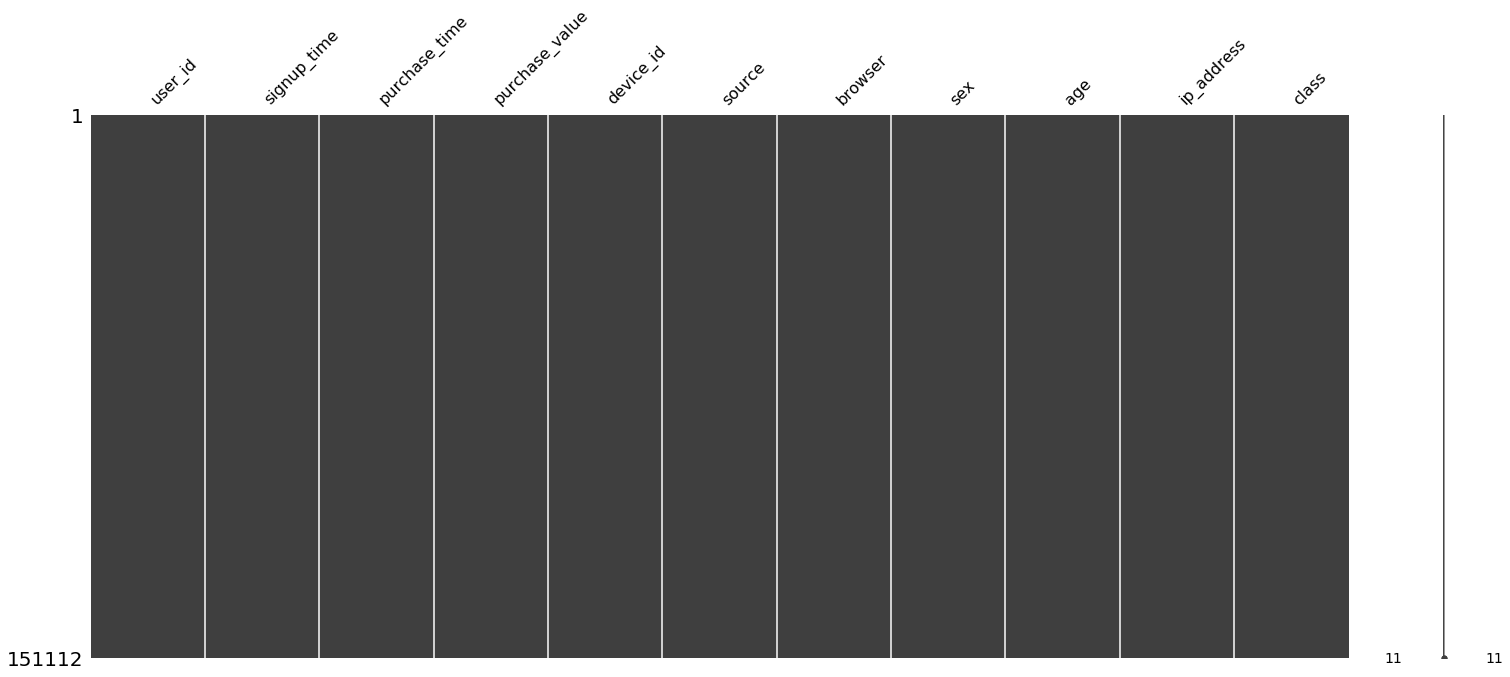

In [5]:
msno.matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e2428d0>,
      dtype=object)

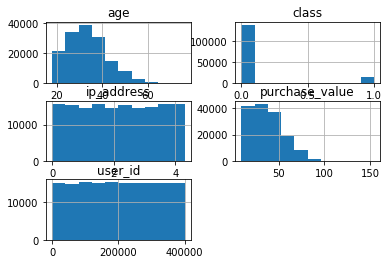

In [6]:
df.hist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
df0 = df[df["class"]==0]
df1 = df[df["class"]==1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d975438>,
      dtype=object)

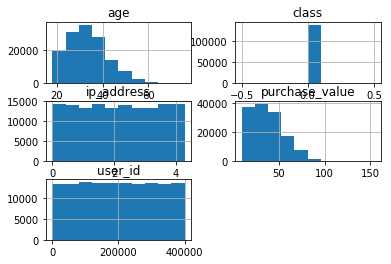

In [9]:
df0.hist()

In [10]:
print(len(df0))
print(len(df1))

136961
14151


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c85fdd8>,
      dtype=object)

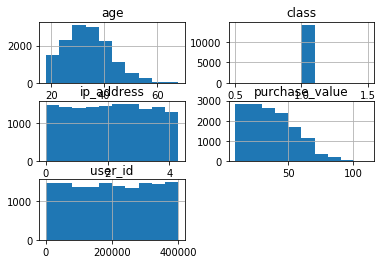

In [11]:
df1.hist()

In [12]:
a = pd.read_csv("../../fraud/IpAddress_to_Country.csv")
a.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [15]:
a.country.unique()

array(['Australia', 'China', 'Japan', 'Thailand', 'India', 'Malaysia',
       'Korea Republic of', 'Hong Kong',
       'Taiwan; Republic of China (ROC)', 'Philippines', 'Viet Nam',
       'France', 'European Union', 'United Kingdom', 'Italy',
       'United Arab Emirates', 'Israel', 'Ukraine', 'Russian Federation',
       'Sweden', 'Kazakhstan', 'Portugal', 'Greece', 'Saudi Arabia',
       'Denmark', 'Spain', 'Iran (ISLAMIC Republic Of)', 'Norway',
       'Germany', 'United States', 'Syrian Arab Republic', 'Cyprus',
       'Czech Republic', 'Switzerland', 'Iraq', 'Netherlands', 'Turkey',
       'Romania', 'Lebanon', 'Hungary', 'Georgia', 'Azerbaijan',
       'Austria', 'Palestinian Territory Occupied', 'Lithuania', 'Oman',
       'Serbia', 'Finland', 'Belgium', 'Bulgaria', 'Slovenia',
       'Moldova Republic of', 'Macedonia', 'Estonia', 'Liechtenstein',
       'Croatia (LOCAL Name: Hrvatska)', 'Poland',
       'Bosnia and Herzegowina', 'Latvia', 'Jordan', 'Kyrgyzstan',
       'Ireland

Ideas:<br>
1. Look at correlation matrix
2. Keep 20% of the aside
3. Plot errthing
4. Plot of the world: heatmap
5. Lasso regression/SGD: leave one out


In [16]:
def IP_to_country(ip) :
    try :
        return IP_table.country[(IP_table.lower_bound_ip_address < ip)                            
                                & 
                                (IP_table.upper_bound_ip_address > ip)].iloc[0]
    except IndexError :
        return "Unknown"